<a href="https://colab.research.google.com/github/qwe-creator/landing-page-on-susatinable-environment/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [46]:
data=pd.read_csv('Seed_Data.csv')
X=data.drop('target',axis=1)
y=data['target']

In [47]:
splits=[(0.8,0.2),(0.7,0.3)]

In [67]:
param_grid ={
    'criterion' :['gini','entropy'],
    'max_depth' : [2,3,4],
    'min_samples_split':[3,5]
}

In [51]:
for train_size , test_size in splits:
   X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=train_size,test_size=test_size)

In [53]:
dt=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,cv=5,param_grid=param_grid,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_split': [3, 5]},
             scoring='accuracy')

In [54]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test,y_pred)
print(f'accuracy for {train_size*100} is {accuracy*100}')

accuracy for 70.0 is 93.65079365079364


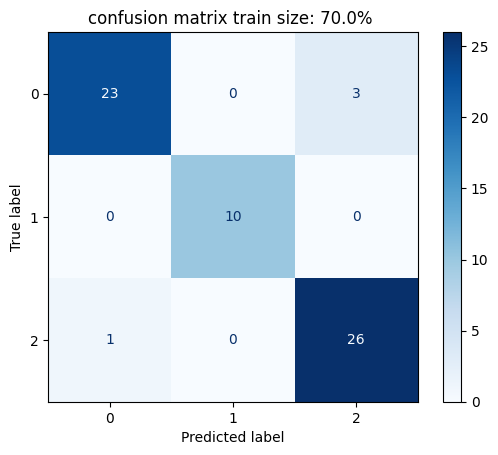

In [60]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f'confusion matrix train size: {train_size*100}% ')
plt.show()

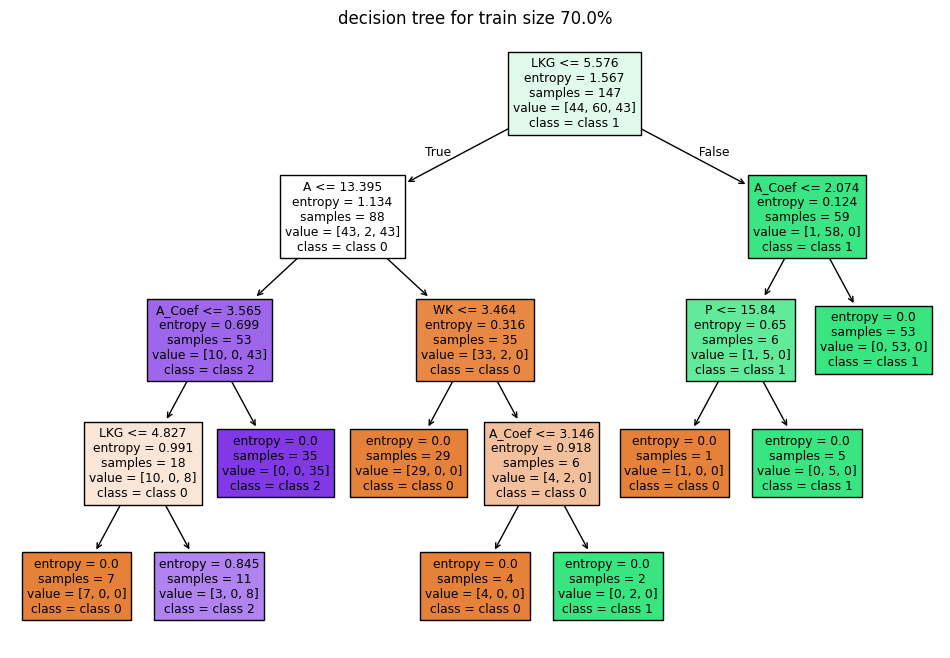

In [66]:
plt.figure(figsize=(12,8))
plot_tree(best_model,filled=True,feature_names=X.columns,class_names=['class 0','class 1','class 2'])
plt.title(f'decision tree for train size {train_size*100}%')
plt.show()